<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/VGG/Fashion_Mnist_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 141 (delta 73), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (141/141), 630.61 KiB | 10.01 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [5]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 28, 28])
torch.Size([512])


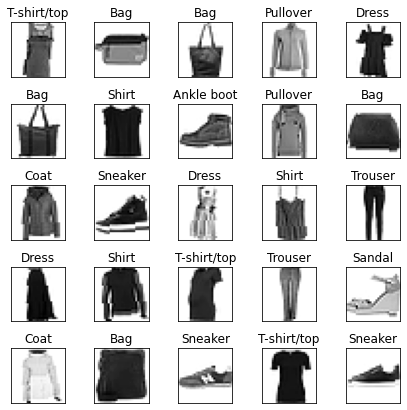

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [7]:
import vggnet
net = vggnet.VGG('VGG16')

In [8]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-

In [10]:
import evascheduler

In [11]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.16436733305454254 Batch_id=117 Accuracy=83.15: 100%|██████████| 118/118 [01:34<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1575, Accuracy: 8425/10000 (84.25%)

EPOCH: 1


Loss=0.3577304780483246 Batch_id=117 Accuracy=90.34: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1371, Accuracy: 8629/10000 (86.29%)

EPOCH: 2


Loss=0.2489130049943924 Batch_id=117 Accuracy=91.72: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0894, Accuracy: 9106/10000 (91.06%)

EPOCH: 3


Loss=0.17230165004730225 Batch_id=117 Accuracy=93.06: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0881, Accuracy: 9119/10000 (91.19%)

EPOCH: 4


Loss=0.17064006626605988 Batch_id=117 Accuracy=93.75: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0767, Accuracy: 9233/10000 (92.33%)

EPOCH: 5


Loss=0.12244769185781479 Batch_id=117 Accuracy=94.54: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0822, Accuracy: 9178/10000 (91.78%)

EPOCH: 6


Loss=0.03440380468964577 Batch_id=117 Accuracy=96.25: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0644, Accuracy: 9356/10000 (93.56%)

EPOCH: 7


Loss=0.04241165518760681 Batch_id=117 Accuracy=96.97: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0657, Accuracy: 9343/10000 (93.43%)

EPOCH: 8


Loss=0.10516073554754257 Batch_id=117 Accuracy=97.17: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0676, Accuracy: 9324/10000 (93.24%)

EPOCH: 9


Loss=0.06491316854953766 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0652, Accuracy: 9348/10000 (93.48%)

EPOCH: 10


Loss=0.06137573719024658 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [01:34<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0632, Accuracy: 9368/10000 (93.68%)

EPOCH: 11


Loss=0.0741131380200386 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [01:34<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0640, Accuracy: 9360/10000 (93.60%)

EPOCH: 12


Loss=0.04747762158513069 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [01:34<00:00,  1.25it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0651, Accuracy: 9349/10000 (93.49%)

EPOCH: 13


Loss=0.10453072190284729 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [01:34<00:00,  1.25it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0638, Accuracy: 9362/10000 (93.62%)

EPOCH: 14


Loss=0.02667141519486904 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [01:34<00:00,  1.25it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0647, Accuracy: 9353/10000 (93.53%)

EPOCH: 15


Loss=0.04746819660067558 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0650, Accuracy: 9350/10000 (93.50%)

EPOCH: 16


Loss=0.024519190192222595 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0643, Accuracy: 9357/10000 (93.57%)

EPOCH: 17


Loss=0.0386328287422657 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0638, Accuracy: 9362/10000 (93.62%)

EPOCH: 18


Loss=0.039154719561338425 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9351/10000 (93.51%)

EPOCH: 19


Loss=0.08338886499404907 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [01:35<00:00,  1.24it/s]



Test set: Average loss: 0.0641, Accuracy: 9359/10000 (93.59%)



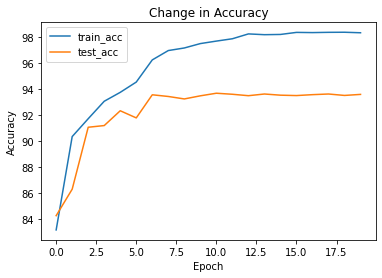

In [12]:
from evascheduler import draw_graph
draw_graph()

In [13]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [14]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


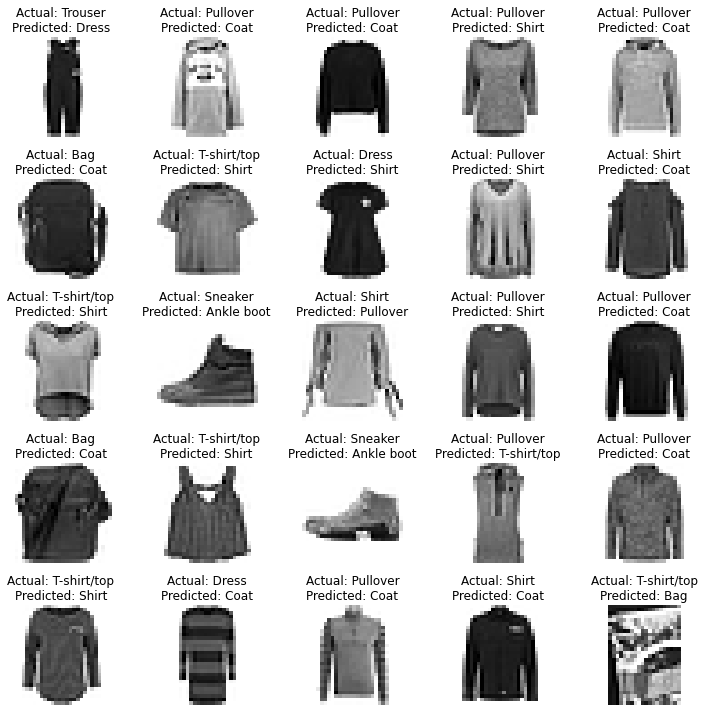

In [15]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")